# Final Project: AirBnB NYC

In [257]:
#importing libraries for analysis of data
#using pandas function to read csv file from Kaggle:
#https://www.kaggle.com/datasets/dgomonov/new-york-city-airbnb-open-data/data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


df=pd.read_csv("AB_NYC_2019.csv")

## Understanding the Dataset

In [240]:
#using head to get a brief snapshot of the data:
df.head(5)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [241]:
#using shape to get a sense of how many columns and rows this dataset contains
df.shape

(48895, 16)

In [225]:
#using dtypes to get the data types for each column/field in the dataset
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [242]:
#using describe to get a brief summary of the columns in the dataset. 
#most of the statistical calculation columns are helpful, with the exception of id and host_id, latitude, & longitude
#so they've been droped from the describe function below
df.drop(["id","host_id","latitude","longitude"],axis=1).describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


## Cleaning the Dataset

In [243]:
#Checking for duplicates. Here we see that there are no duplicate rows.

duplicate_rows_df = df[df.duplicated()]
print("Number of duplicated rows: ", duplicate_rows_df.shape)

Number of duplicated rows:  (0, 16)


Using info below to check where there are missing values. We see missing values in name, host_name, last_review, & reviews_per_month. It's possible that a listing name and host name are not required by AirBnB although it does seem surprising. These fields are not important for our purposes, so it's not concerning. Last_review and reviews_per_month show the same number of non-null values. This is likely because these listings have not received any reviews.

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

Replacing the reviews_per_month that are null with zeros and calculating the overall average produces an average of 1.09 compared to the average with null values of 1.37.

The decision to fill or not fill the null values with zero skews the average. It essentially depends on the analysis being done. Here I've decided to include the nulls (replaced by zeros) as it is reflective of all listings and their reviews or lack thereof.

In [250]:
df_filled=df.fillna(0)
mean_filled = df_filled.reviews_per_month.mean()
non_filled=df.reviews_per_month.mean()


The host_name field is not important for our analysis purposes and could present ethical issues if left in the data set, thus it has been dropped.

In [258]:
df = df.fillna(0)
df.drop('host_name', axis=1, inplace=True)
df.head(5)

,id,name,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0,0.00,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Exploring the Dataset

Beginning to explore the business question(s). Here we first break down the number of listings by room_type to get a sense of what types of listings are more common. We see below that Entire/home apts and private rooms make up roughly 98% of the listings with a near even split between the two (entire home/apt at 52% and private room at 46%), while shared room in contrast accounts for a the remaining 2%.

In [203]:
x = df.room_type.value_counts()
print("% of listings in room_type:")
x/x.sum()*100

% of listings by room_type:


Entire home/apt    51.966459
Private room       45.661111
Shared room         2.372431
Name: room_type, dtype: float64

Using a barchart here as it is a direct comparison of numbers


Text(0.5, 1.0, 'Number Listings per Room Type')

<Figure size 100x200 with 0 Axes>

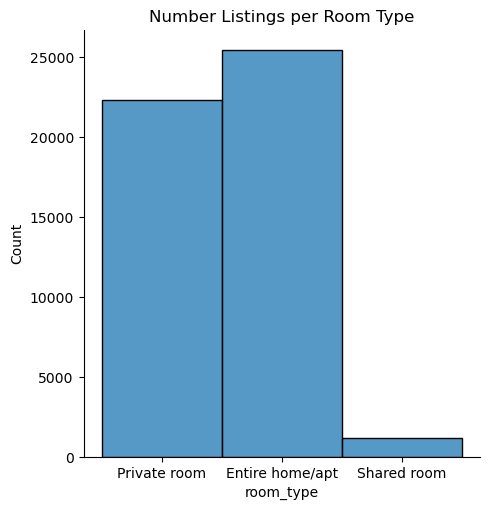

In [168]:
#Using a barchart here as it is a direct comparison of numbers
plt.figure(figsize=(1,2))
sns.displot(df.room_type)
plt.title("Number Listings per Room Type")


Taking this a step further, we see what price differences there are between room types overall across NYC. Not suprisingly, we see that average prices are highest for renting an entire home/apt, followed by private rooms and shared rooms. We also see that the difference between private room and entire home/apt is much larger than the difference between shared room and private room.

In [204]:
avg_prices = df.groupby("room_type")["price"].mean()
avg_prices


room_type
Entire home/apt    211.794246
Private room        89.780973
Shared room         70.127586
Name: price, dtype: float64

<Axes: title={'center': 'Average Price per Room Type'}, xlabel='Room Type', ylabel='Price'>

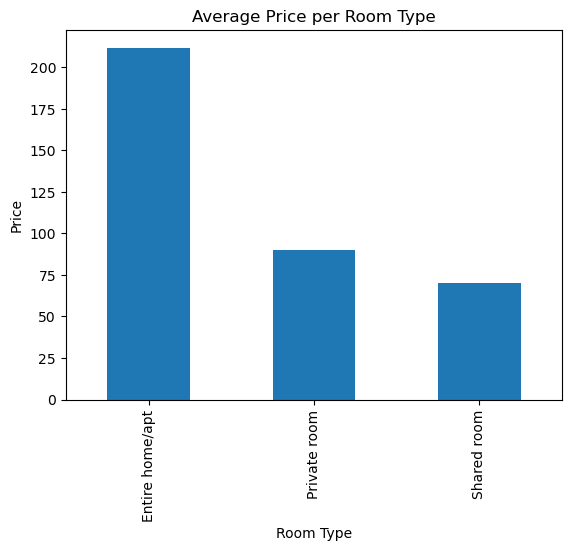

In [205]:
overall_price_plt = df.groupby("room_type")["price"].mean().to_frame().reset_index()
overall_price_plt.plot(kind='bar', title="Average Price per Room Type",legend=False, xlabel="Room Type",ylabel="Price",x="room_type")


Text(0.5, 1.0, 'Distribution of prices per room type')

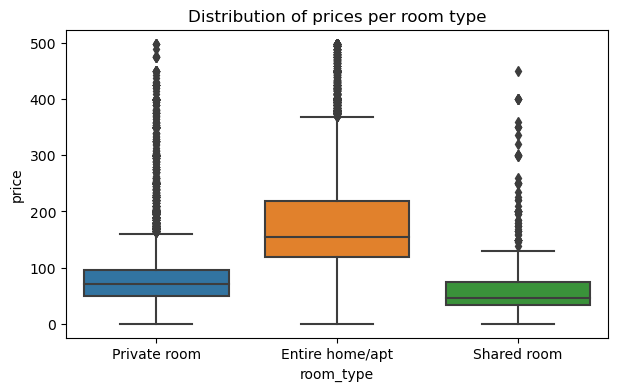

In [279]:
#using a boxplot to show the distribution of prices by room type
sub=df[df.price < 500]
plt.figure(figsize=(7,4))
boxplot_neigborhood=sns.boxplot(x = "room_type", y = "price", data=sub)
boxplot_neigborhood.set_title('Distribution of prices per room type')

While the pricing averages show what we would expect at a high level, the % increase in pricing adds more detail to the analysis. As seen below, pricing for an entire apartment or home is on average, roughly 136% higher than a private room. We don't see the same price hike when looking at a private room vs shared room which is showing a 28% increase in price.

In [206]:
private_room_percentage_difference = ((avg_prices["Entire home/apt"] - avg_prices["Private room"]) / avg_prices["Private room"]) * 100
shared_room_percentage_difference = ((avg_prices["Private room"] - avg_prices["Shared room"]) / avg_prices["Shared room"]) * 100
print(
)
print(f"The percentage higher of Entire home/apt compared to Private room is {private_room_percentage_difference:.2f}%")
print(f"The percentage higher of Private room compared to Shared room is {shared_room_percentage_difference:.2f}%")


The percentage higher of Entire home/apt compared to Private room is 135.90%
The percentage higher of Private room compared to Shared room is 28.03%


While interesting and informative to see differences in pricing per room type, layering in neighbourhood group is an important piece of this analsyis. To begin, we look at the distribution of listings across the neighborhood groups and we see that Manhattan and Brooklyn together comprise roughly 85% of all listings. Queens makes up the next largest percent with roughly 11.5% of listings. Staten Island and the Bronx bring up the end with roughly 3% combined.

In [259]:
x = df.neighbourhood_group.value_counts()
print("% of listings in neighborhood group:")
x/x.sum()*100

% of listings in neighborhood group:


Manhattan        44.301053
Brooklyn         41.116679
Queens           11.588097
Bronx             2.231312
Staten Island     0.762859
Name: neighbourhood_group, dtype: float64

Text(0.5, 1.0, 'Number Listings per Neighborhood_group')

<Figure size 100x200 with 0 Axes>

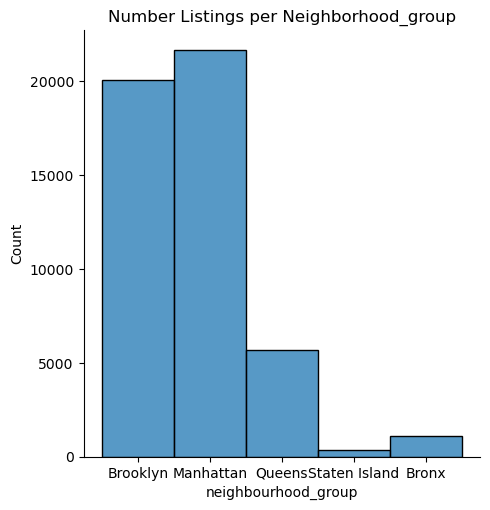

In [208]:
#Using a barchart here as it is a direct comparison of numbers
plt.figure(figsize=(1,2))
sns.displot(df.neighbourhood_group)
plt.title("Number Listings per Neighborhood_group")


Taking the analysis one step further, we look at the impact that neighborhood group has on pricing. At a high level we see that Manhattan is the most expensive neighborhood to stay in across all room types.

After Manhattan, it makes the most sense to analyze by room type as there isn't a clear second across the board. For entire home/apt Brooklyn is the next most expensive neighborhood to stay in, followed by Staten Island, Queens, and finishing with the Bronx.

For a private room, the pattern is slightly different where Manhattan is followed by Brooklyn, Queens, the Bronx, and lastly Staten Island.

Finally, for a shared room, after Manhattan we see Queens disrupting previous patterns with the second highest average price, followed by the Bronx, Staten Island, and finishing with Brooklyn as the cheapest -- again bucking the trends we saw with the other room types.

Interestingly, there are some options like a shared room in Manhattan that is more expensive than a private room in all the other neighborhood groups, while an entire home/apt, even the cheapest option, is still more expensive than any of the private room options.

In [210]:
print("Average prices per neighborhood group per room type:")
df.groupby(["neighbourhood_group", "room_type"])["price"].mean().unstack()

Average prices per neighborhood group per room type:


room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.506596,66.788344,59.800000
Brooklyn,178.327545,76.500099,50.527845
Manhattan,249.239109,116.776622,88.977083
Queens,147.050573,71.762456,69.020202
Staten Island,173.846591,62.292553,57.444444


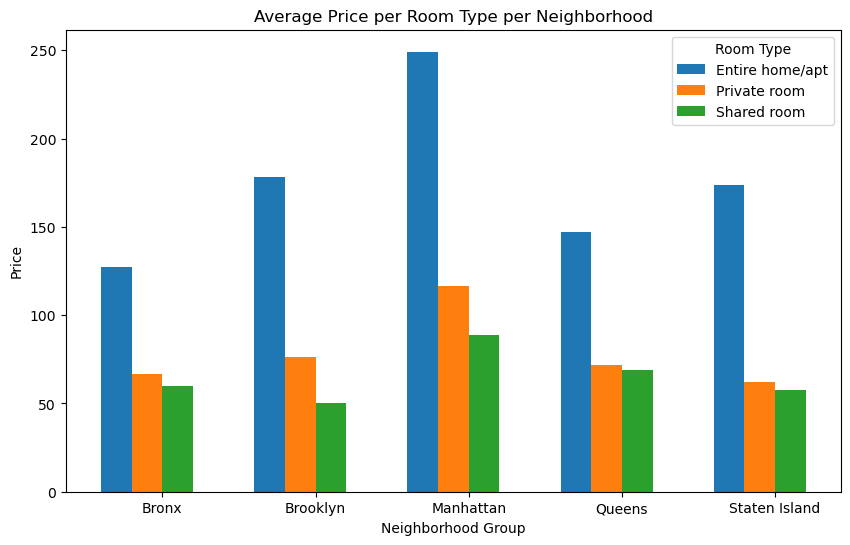

In [286]:
#pivot table for better visualization
pivot_table = neighborhood_price_plt.pivot(index='neighbourhood_group', columns='room_type', values='price')

#unique neighborhood groups
room_types = pivot_table.columns.tolist()

#setting positions for the bars
x = range(len(pivot_table))

#defining the width of each bar
width = 0.2

#creating a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

#looping through each neighbourhood group and plot the bars
for i, neighbourhood_group in enumerate(neighbourhood_groups):
    ax.bar(
        [pos + width * i for pos in x],
        pivot_table[neighbourhood_group],
        width=width,
        label=neighbourhood_group
    )

#setting the x-axis ticks and labels
ax.set_xticks([pos + width * 1.5 for pos in x])
ax.set_xticklabels(pivot_table.index)

plt.xlabel("Neighborhood Group")
plt.ylabel("Price")
plt.title("Average Price per Room Type per Neighborhood")
plt.legend(title="Room Type")

# Show the plot
plt.show()

Text(0.5, 1.0, 'Distribution of prices per neighborhood type')

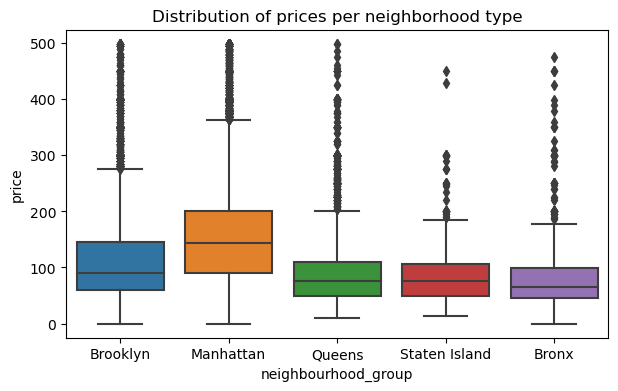

In [276]:
sub=df[df.price < 500]
plt.figure(figsize=(7,4))
boxplot_neigborhood=sns.boxplot(x = "neighbourhood_group", y = "price", data=sub)
boxplot_neigborhood.set_title('Distribution of prices per neighborhood type')


Previously we saw unsurprisingly that an entire room/apt was the most expensive option, followed by private room, and shared room. Going a bit deeper, we can calculate the % jump in pricing between different room types in each neighborhood group. Here we see that Staten Island sees the sharpest increase in pricing between a private room and entire home/apt. Brooklyn follows with the second highest price increase. Manhattan, which has the highest prices overall, interestingly has the only the third highest price difference, followed closely by Queens and the Bronx.

In [212]:
avg_prices = df.groupby(["neighbourhood_group", "room_type"])["price"].mean().unstack()

percentage_differences = (
    ((avg_prices["Entire home/apt"] - avg_prices["Private room"]) / avg_prices["Private room"]) * 100
)

print("Percentage price difference of Entire home/apt to Private room per neighbourhood_group:")
print(percentage_differences)

Percentage price difference of Entire home/apt to Private room per neighbourhood_group:
neighbourhood_group
Bronx             90.911452
Brooklyn         133.107601
Manhattan        113.432367
Queens           104.912961
Staten Island    179.080856
dtype: float64


The jump in prices decreases dramatically when looking at a private room vs a shared room. The highest difference here is in Brooklyn, followed by Manhattan. Bronx, Staten Island, and Queens, respectively in that order, mark much lower price increases from shared room to private room, with Queens bringing up the low end with only 4% average increase.

In [213]:
avg_prices = df.groupby(["neighbourhood_group", "room_type"])["price"].mean().unstack()

percentage_differences = (
    ((avg_prices["Private room"] - avg_prices["Shared room"]) / avg_prices["Shared room"]) * 100)

print("Percentage price difference of Private room to shared room per neighbourhood_group:")
print(percentage_differences)



Percentage price difference of Private room to shared room per neighbourhood_group:
neighbourhood_group
Bronx            11.686193
Brooklyn         51.401863
Manhattan        31.243482
Queens            3.973117
Staten Island     8.439648
dtype: float64


### Summarize Your Results
#### With your EDA complete, answer the following questions.

#### Was there anything surprising about your dataset?
For the most part it displayed what I expected it to display.

#### Do you have any concerns about your dataset?
I don't, although I do realize that there are lots of other factors that play into pricing that are not present here (ex. amenities)

#### Is there anything you want to make note of for the next phase of your analysis, which is cleaning data?
I'd like to examine duplicates and null values and determine how to best address them.

In [222]:
correlation_matrix = df[["price","number_of_reviews","reviews_per_month","minimum_nights"]].corr()
correlation_matrix

,price,number_of_reviews,reviews_per_month,minimum_nights
price,1.000000,-0.047954,-0.030608,0.042799
number_of_reviews,-0.047954,1.000000,0.549868,-0.080116
reviews_per_month,-0.030608,0.549868,1.000000,-0.121702
minimum_nights,0.042799,-0.080116,-0.121702,1.000000


In [62]:
#ideas for additional analysis:
#number of reviews, prices per room type and area, number of listings and number of bookings per property; minimum nights on booking, availability on booking
#putting coordinates in a map (is there a library that does this)--ask chat gpt if pandas does it or maybe matplotlib (geopanda?)
#graphs (pie chart, line chart, bar chart, cluster with pricing/location, box plot (min, max, avg)
#correlation
#look at outliers, boxplot
